In [1]:
import pandas as pd
import numpy as np
import torch
import os
from utils import *
from model import *
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [2]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
train_losses = pd.read_csv("../outputs/train_losses_wrt_hidden_sizes.csv")

In [11]:
train_losses_min = train_losses.min(axis=0)

In [19]:
train_losses_min

(1)        0.103845
(2)        0.048301
(3)        0.048386
(4,2)      0.029013
(5,2)      0.022257
(5,3)      0.019894
(6,3)      0.018213
(10,4)     0.016692
(12,5)     0.019593
(16)       0.015575
(16,16)    0.015722
(32)       0.016833
(32,16)    0.019595
dtype: float64

In [20]:
test_losses = pd.read_csv("../outputs/test_losses_wrt_hidden_sizes.csv")

In [21]:
test_losses

,(1),(2),(3),"(4,2)","(5,2)","(5,3)","(6,3)","(10,4)","(12,5)",(16),"(16,16)",(32),"(32,16)"
0,0.147405,0.074343,0.074337,0.049455,0.045115,0.045644,0.037626,0.042719,0.034592,0.042095,0.034499,0.038745,0.03305


In [24]:
header = test_losses.columns.tolist()
header

['(1)',
 '(2)',
 '(3)',
 '(4,2)',
 '(5,2)',
 '(5,3)',
 '(6,3)',
 '(10,4)',
 '(12,5)',
 '(16)',
 '(16,16)',
 '(32)',
 '(32,16)']

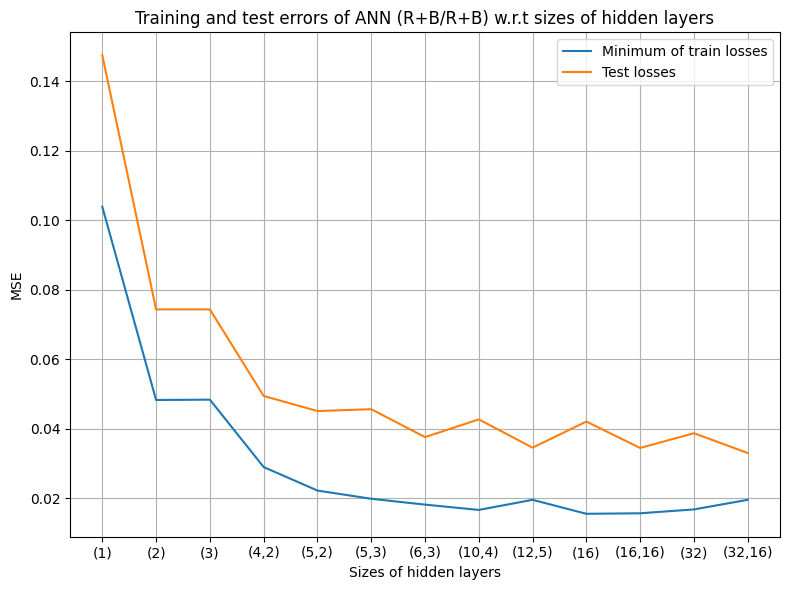

In [30]:
# Plotting the original data and fitted curve
plt.figure(figsize=(8, 6))
plt.plot(header, train_losses_min, label='Minimum of train losses')
plt.plot(header, np.array(test_losses).reshape(-1,), label='Test losses')


plt.title('Training and test errors of ANN (R+B/R+B) w.r.t sizes of hidden layers')
plt.xlabel('Sizes of hidden layers')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()